# In this Notebook...
- Data Preparation
- Classifier models
    - K-Nearest Neighbors
    - Logistic Regression
    - Decision Tree
- Model Evaluation
- Hyperparameter Tuning
- Cross Validation

# Imports

In [80]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from pipetorch import DFrame
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
df_recipes = pd.read_csv("Modified Datasets/ingr_pivot_lunch_diner_noten.csv").set_index("recipe")
df_recipes = df_recipes.loc[:,df_recipes.sum() > 40][df_recipes.sum(axis=1) != 0]
df_recipes.head()

,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),Tasty Tom trostomaat,aardappelen,...,water,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout
recipe,,,,,,,,,,,,,,,,,,,,,
Andijviestamppot met gebakken salami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Libanese wraps met appel-koolsalade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plaattaart met gegrilde groenten en witte kaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Zalmspies met sojaglaze van de BBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
&amp;Suus’ buik-weg-salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_opinion = pd.read_csv("Modified Datasets/food_opinions_jesse.csv")
df_opinion.head()

,recipe,tasty?
0,"Ovenschotel met aardappel­puree, gehakt &amp; ...",1
1,Snelle tuinerwtensoep met gerookte kip en fijn...,1
2,Stoofvlees met La Trappe Quadrupel,1
3,"Belgische stoofpot met bruin bier, wortel &amp...",1
4,Aardappeltjes met gegrilde asperges,0


In [5]:
df_opinion['tasty?'].value_counts()

1    180
0     85
Name: tasty?, dtype: int64

In [6]:
#merge recipes and opinion together
food_op_ingr = pd.merge(df_recipes,df_opinion, how= 'inner',left_on= 'recipe', right_on = 'recipe').set_index('recipe')
food_op_ingr.head()

,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),Tasty Tom trostomaat,aardappelen,...,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout,tasty?
recipe,,,,,,,,,,,,,,,,,,,,,
'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoarma en salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3 tosti's met graskaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
"Aardappelpuree met kaas, groenten en kaaskoekjes",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Aardappelsalade met gerookte zalm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aardappelsalade met lamsham en lentegroenten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Classifier Models
chosen models:
- K Nearest Neighbors
- Logistic Regression
- Decision Tree

In [65]:
#'tasty?' column (yes:1, no:0) as target variable y
#ingredient columns as features X
y = food_op_ingr.iloc[:,-1]
X = food_op_ingr.iloc[:,:-1]

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# KNN Classifier

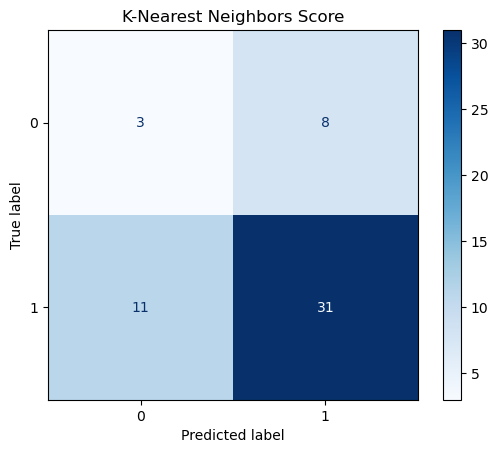

              precision    recall  f1-score    support
0              0.214286  0.272727  0.240000  11.000000
1              0.794872  0.738095  0.765432  42.000000
accuracy       0.641509  0.641509  0.641509   0.641509
macro avg      0.504579  0.505411  0.502716  53.000000
weighted avg   0.674373  0.641509  0.656380  53.000000


In [66]:
#create KNN Classifier
KNN = KNeighborsClassifier(n_neighbors = 28)

#fit the model
KNN.fit(X_train, y_train)

#create predictions
KNN_y_pred = KNN.predict(X_test)

#print confusion matrix and classification report
cm = confusion_matrix(y_test,KNN_y_pred, labels=KNN.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
matrix.plot(cmap='Blues')
plt.title('K-Nearest Neighbors Score')
plt.savefig('KNNmatrix.png',dpi=300)
plt.show()

report = classification_report(y_test,KNN_y_pred,output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

In [35]:
#Hyperparameter Tuning 
#for 1 to 40 neighbors

acclist = []
nbrlist = []

for i in range(1,40):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)
    for a in range(0,100):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train2, y_train2)
        y_pred2 = knn.predict(X_test2)
        accur = precision_score(y_test2, y_pred2)
        accurmean = []
        accurmean.append(accur)
    value = (i,np.mean(accurmean))
    acclist.append(value[1])
    nbrlist.append(value[0])  

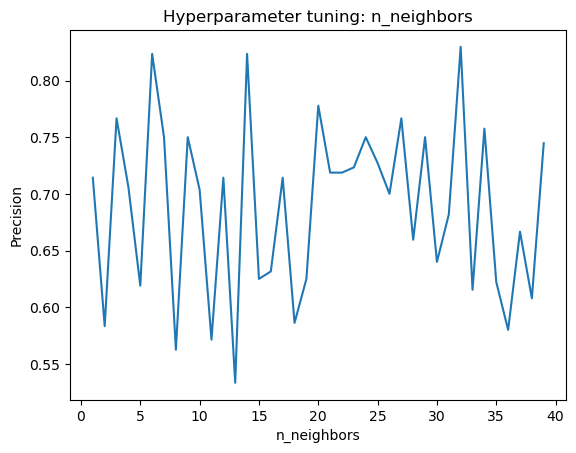

In [69]:
plt.plot(nbrlist,acclist)
plt.title('Hyperparameter tuning: n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Precision')
plt.savefig('KNNtuning.png',dpi=300)
plt.show()   

In [44]:
#GridSearch
param_grid = {'n_neighbors': list(range(1,40))}
KNN_cv = GridSearchCV(KNN, param_grid, cv=10, scoring = 'precision')
KNN_cv.fit(X,y)

print(KNN_cv.best_params_)

{'n_neighbors': 28}


In [95]:
#Cross Validation Score
sk_folds = StratifiedKFold(n_splits = 5)
KNNscores = cross_val_score(KNN, X, y, cv = sk_folds, scoring='precision')
print('CVscores: {0}'.format(KNNscores))
print('average CVscore: {0}'.format(KNNscores.mean()))

CVscores: [0.68292683 0.66666667 0.6744186  0.65789474 0.76190476]
average CVscore: 0.6887623198665979


# LogReg Classifier

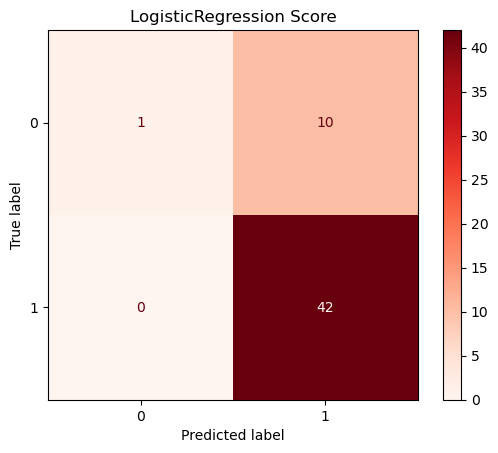

              precision    recall  f1-score    support
0              1.000000  0.090909  0.166667  11.000000
1              0.807692  1.000000  0.893617  42.000000
accuracy       0.811321  0.811321  0.811321   0.811321
macro avg      0.903846  0.545455  0.530142  53.000000
weighted avg   0.847605  0.811321  0.742741  53.000000


In [73]:
#create LogReg Classifier
LR = LogisticRegression(multi_class='ovr', #binary
                        solver = 'liblinear', 
                        penalty = 'l2', 
                        C = 0.1)

#fit the model
LR.fit(X_train, y_train)

#create predictions
LR_y_pred = LR.predict(X_test)

#print confusion matrix and classification report
cm = confusion_matrix(y_test,LR_y_pred, labels=LR.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
matrix.plot(cmap='Reds')
plt.title('LogisticRegression Score')
plt.savefig('LRmatrix.png',dpi=300)
plt.show()

report = classification_report(y_test,LR_y_pred,output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
#perhaps because too many features

In [51]:
#Hyperparameter Tuning
#Best 'C' and 'penalty' for classifier
#GridSearch

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1','l2']}

LR_cv = GridSearchCV(LR, param_grid, cv=5)

LR_cv.fit(X,y)

print(LR_cv.best_params_)

{'C': 1e-05, 'penalty': 'l2'}


In [102]:
#Cross Validation Score
sk_folds = StratifiedKFold(n_splits = 5)
LRscores = cross_val_score(LR, X, y, cv = sk_folds, scoring='precision')
print('CVscores: {0}'.format(LRscores))
print('average CVscore: {0}'.format(LRscores.mean()))

CVscores: [0.67924528 0.67924528 0.67307692 0.66666667 0.66666667]
average CVscore: 0.6729801644895984


# Decision Tree Classifier

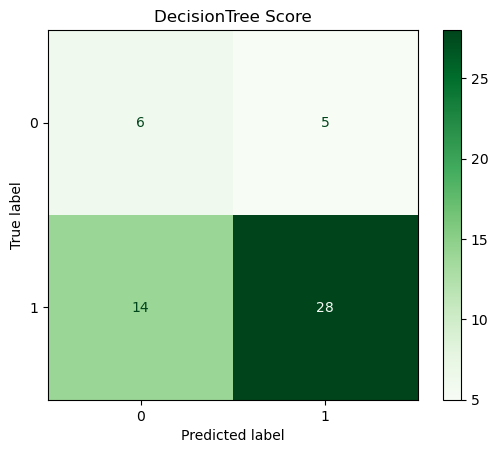

              precision    recall  f1-score    support
0              0.300000  0.545455  0.387097  11.000000
1              0.848485  0.666667  0.746667  42.000000
accuracy       0.641509  0.641509  0.641509   0.641509
macro avg      0.574242  0.606061  0.566882  53.000000
weighted avg   0.734648  0.641509  0.672039  53.000000


In [68]:
#create dectree classsifier
DTC = DecisionTreeClassifier(max_depth=33)

#fit the model
DTC.fit(X_train, y_train)

#create predictions
DTC_y_pred = DTC.predict(X_test)

#print confusion matrix and classification report
cm = confusion_matrix(y_test,DTC_y_pred, labels=DTC.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC.classes_)
matrix.plot(cmap='Greens')
plt.title('DecisionTree Score')
plt.savefig('DTCmatrix.png',dpi=300)
plt.show()

report = classification_report(y_test,DTC_y_pred,output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

In [63]:
#Hyperparameter Tuning
#Max_depth from 1 to 50 while constantly altering train and test sets
accurlist = []
mdepthlist = []

for i in range(1,50):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)
    for a in range(0,100):
        dtc = DecisionTreeClassifier(max_depth = i)
        dtc.fit(X_train2, y_train2)
        y_pred2 = dtc.predict(X_test2)
        accur = precision_score(y_test2, y_pred2)
        accurmean = []
        accurmean.append(accur)
    value = (i,np.mean(accurmean))
    accurlist.append(value[1])
    mdepthlist.append(value[0])     

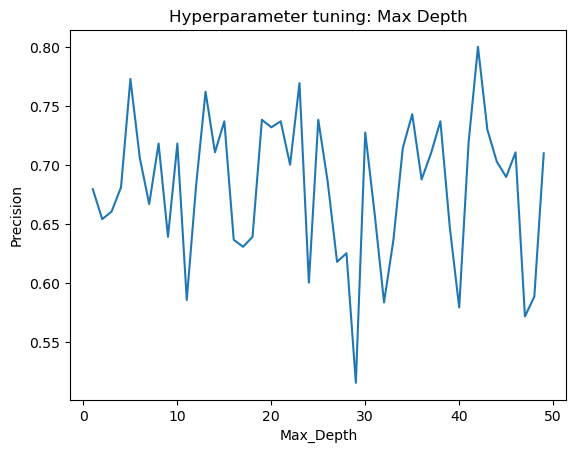

In [70]:
plt.plot(mdepthlist,accurlist)
plt.title('Hyperparameter tuning: Max Depth')
plt.xlabel('Max_Depth')
plt.ylabel('Precision')
plt.savefig('DTFtuning.png',dpi=300)
plt.show()   

In [60]:
#GridSearch
param_grid = {'max_depth': list(range(1,50))}
DTC_cv = GridSearchCV(DTC, param_grid, cv=10, scoring = 'precision')
DTC_cv.fit(X,y)

print(DTC_cv.best_params_)

{'max_depth': 33}


In [101]:
#Cross Validation Score
sk_folds = StratifiedKFold(n_splits = 5)
DTCscores = cross_val_score(LR, X, y, cv = sk_folds, scoring='precision')
print('CVscores: {0}'.format(DTCscores))
print('average CVscore: {0}'.format(DTCscores.mean()))

CVscores: [0.67924528 0.67924528 0.67307692 0.66666667 0.66666667]
average CVscore: 0.6729801644895984
